In [52]:
                      ################## Test The Model ######################

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
x_train = train_datagen.flow_from_directory(r"C:\Program Files\Dataset\training_set", target_size=(64,64),batch_size=100,
                                            class_mode='categorical', color_mode ="grayscale")

Found 15750 images belonging to 9 classes.


In [20]:
x_test = test_datagen.flow_from_directory(r"C:\Program Files\Dataset\test_set", target_size=(64,64),batch_size=100,
                                         class_mode='categorical', color_mode ="grayscale")

Found 2250 images belonging to 9 classes.


In [21]:
len(x_train)

158

In [22]:
len(x_test)

23

In [23]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [ ]:
        ###################### Import The Packages And Load The Saved Model ######################

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [25]:
#Creating the model
model=Sequential()
#Adding the layers
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#adding hidden layers
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))

#Adding the output layer
model.add(Dense(9, activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
30/30 [==============================] - 21s 697ms/step - loss: 1.1565 - accuracy: 0.6160 - val_loss: 0.5600 - val_accuracy: 0.8102
Epoch 2/10
30/30 [==============================] - 15s 504ms/step - loss: 0.3481 - accuracy: 0.8922
Epoch 3/10
30/30 [==============================] - 15s 509ms/step - loss: 0.1948 - accuracy: 0.9447
Epoch 4/10
30/30 [==============================] - 15s 516ms/step - loss: 0.1390 - accuracy: 0.9553
Epoch 5/10
30/30 [==============================] - 15s 511ms/step - loss: 0.0763 - accuracy: 0.9790
Epoch 6/10
30/30 [==============================] - 15s 505ms/step - loss: 0.0560 - accuracy: 0.9843
Epoch 7/10
30/30 [==============================] - 15s 501ms/step - loss: 0.0506 - accuracy: 0.9877
Epoch 8/10
30/30 [==============================] - 15s 497ms/step - loss: 0.0466 - accuracy: 0.9867
Epoch 9/10
30/30 [==============================] - 15s 502ms/step - loss:

In [28]:
model.save('HandSign.h5')

In [ ]:
################################## Load The Test Image, Pre-Process It And Predict #############################

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [41]:
model = load_model("C:\Program Files\HandSign.h5")

In [46]:
img = image.load_img('C:\\Program Files\\Dataset\\test_set\\A\\10.png',target_size = (100,100))


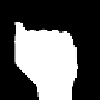

In [47]:
img

In [48]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [49]:
img=image.load_img("C:\\Program Files\\Dataset\\test_set\\A\\12.png")
detect(img)

THE PREDICTED LETTER IS  A


In [50]:
img = image.load_img('C:\\Program Files\\Dataset\\test_set\\E\\39.png')
pred=detect(img)

THE PREDICTED LETTER IS  E


In [51]:
img = image.load_img('C:\\Program Files\\Dataset\\test_set\\F\\15.png')
pred=detect(img)

THE PREDICTED LETTER IS  F


In [ ]:
 ################################### Successfully Tested The Model #################################